<a href="https://colab.research.google.com/github/Mohamedaflal26/cognifyz-projects/blob/main/aflaltask_4_location_based_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
%matplotlib inline

In [ ]:
data =pd.read_csv('Dataset.csv')

In [ ]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
gdf =gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.Longitude, data.Latitude))

<ipython-input-13-f303522edb1d>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world =gpd.datasets.get_path('naturalearth_lowres')


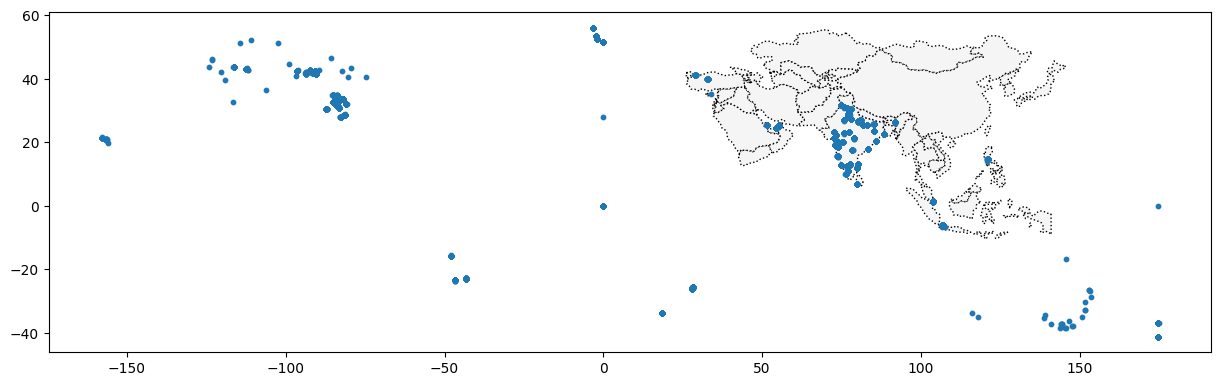

In [ ]:
world =gpd.datasets.get_path('naturalearth_lowres')
gdf_world =gpd.read_file(world)

ax = gdf_world[gdf_world.continent =="Asia"].plot(figsize=(15,10),color='whitesmoke',linestyle=':',edgecolor="black")
gdf.plot(ax=ax, markersize=10)
plt.show()

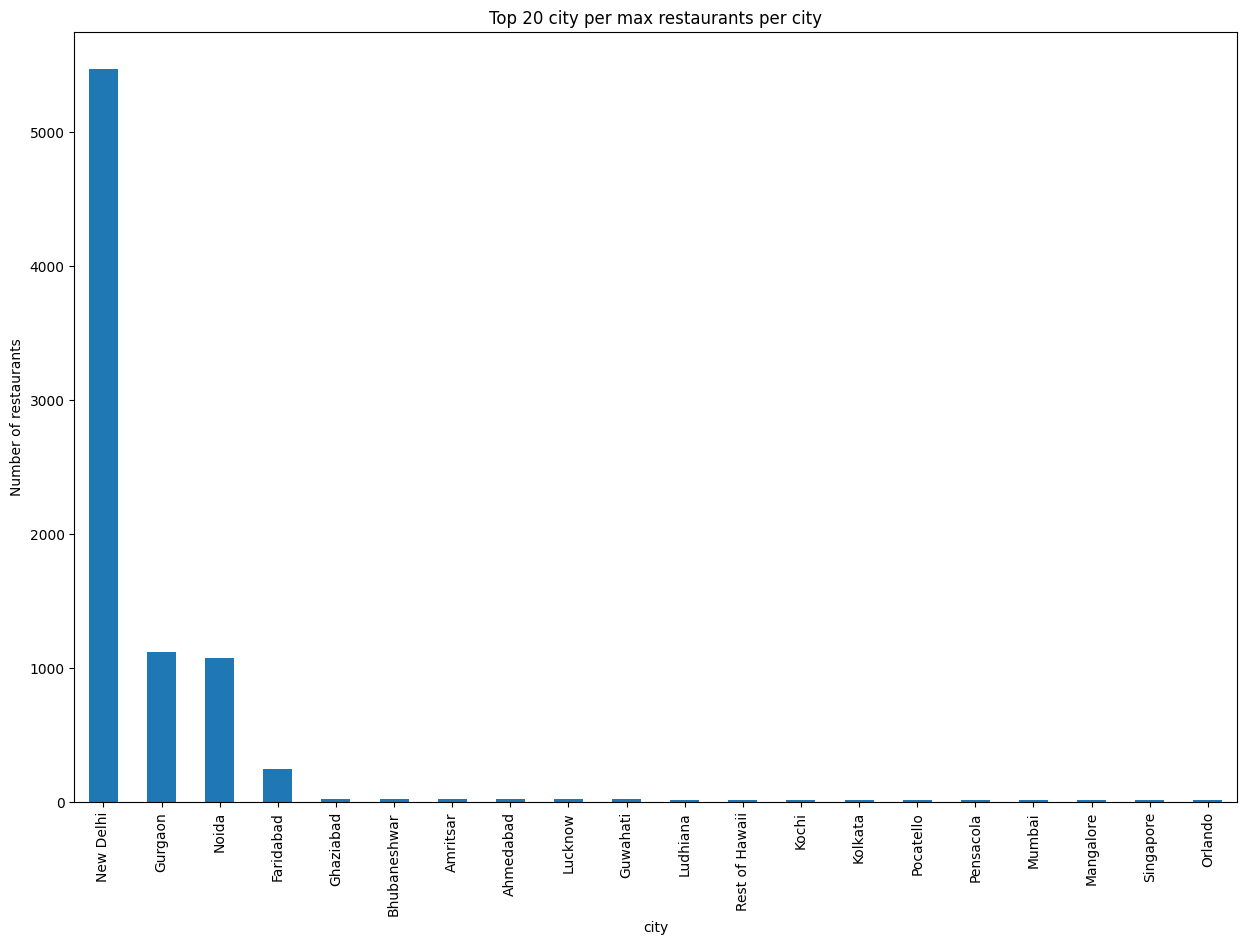

In [ ]:
City_counts = gdf['City'].value_counts()
#display number of restaurants per city
City_counts.head(20).plot(kind='bar',figsize=(15,10))
plt.title('Top 20 city per max restaurants per city')
plt.xlabel('city')
plt.ylabel('Number of restaurants')
plt.show()

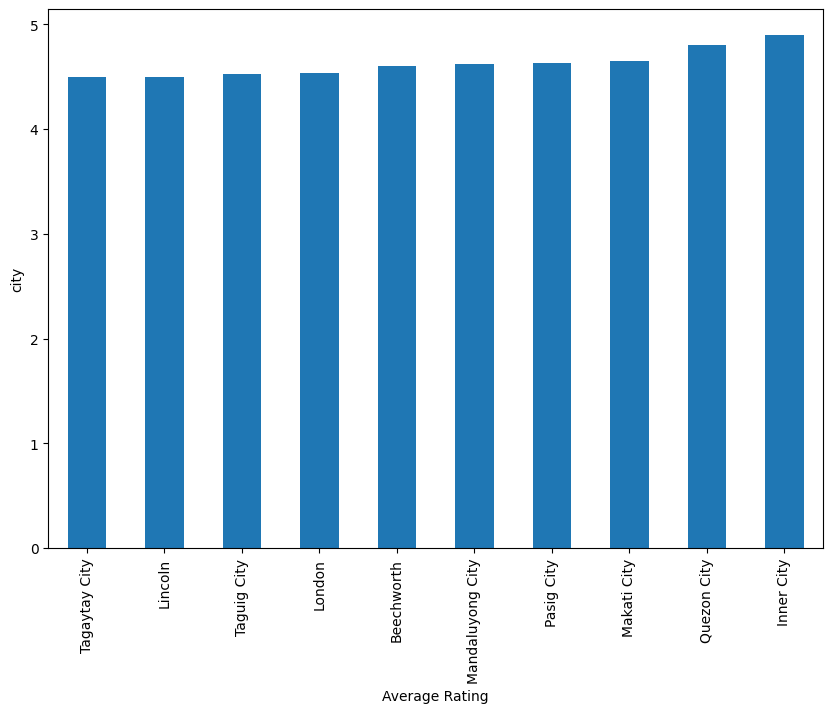

In [ ]:
avg_ratings = gdf.groupby('City')['Aggregate rating'].mean()
avg_ratings.sort_values(ascending=True).tail(10).plot(kind='bar',figsize=(10,7))
plt.xlabel('Average Rating')
plt.ylabel('city')
plt.show()

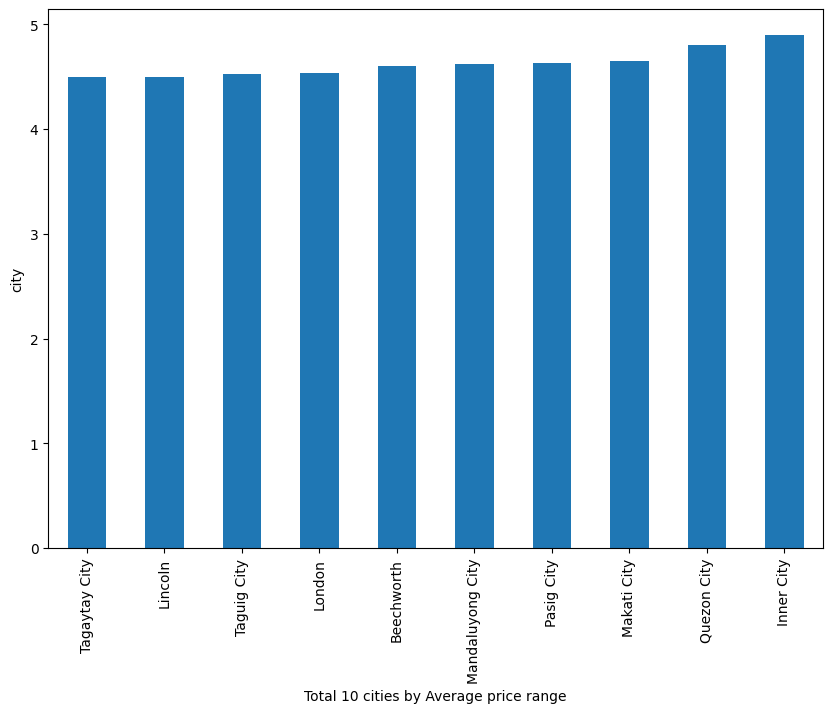

In [ ]:
avg_price_range = gdf.groupby('City')['Price range'].mean()
avg_ratings.sort_values(ascending=True).tail(10).plot(kind='bar',figsize=(10,7))
plt.xlabel('Total 10 cities by Average price range')
plt.ylabel('city')
plt.show()